### **Covid 19 Deaths Prediction Model**

'First 5 rows of the dataset'

,date,state,fips,cases,deaths
49552,2022-08-14,Puerto Rico,72,924786,4852
34556,2021-11-19,Wisconsin,55,945854,9816
47699,2022-07-12,Northern Mariana Islands,69,11829,35
48101,2022-07-19,Texas,48,7321472,89201
3715,2020-05-09,Iowa,19,11671,252


'Number of missing values in each column'

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

'Number of missing values in each column after dropping NaN values'

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

'First 5 rows of the dataset after adding new columns'

,date,state,fips,cases,deaths
49552,2022-08-14,Puerto Rico,72,924786,4852
34556,2021-11-19,Wisconsin,55,945854,9816
47699,2022-07-12,Northern Mariana Islands,69,11829,35
48101,2022-07-19,Texas,48,7321472,89201
3715,2020-05-09,Iowa,19,11671,252


Death rate in US is 1.308635369777776 %


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3097 entries, 49552 to 15110
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3097 non-null   datetime64[ns]
 1   state   3097 non-null   object        
 2   fips    3097 non-null   int64         
 3   cases   3097 non-null   int64         
 4   deaths  3097 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 145.2+ KB


17:06:10 - cmdstanpy - INFO - Chain [1] start processing
17:06:11 - cmdstanpy - INFO - Chain [1] done processing


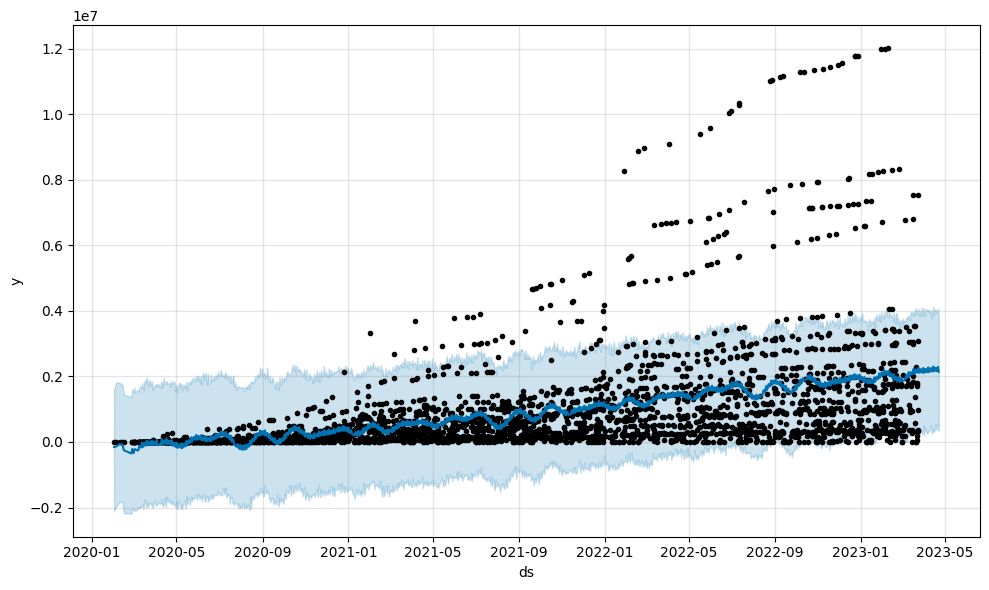

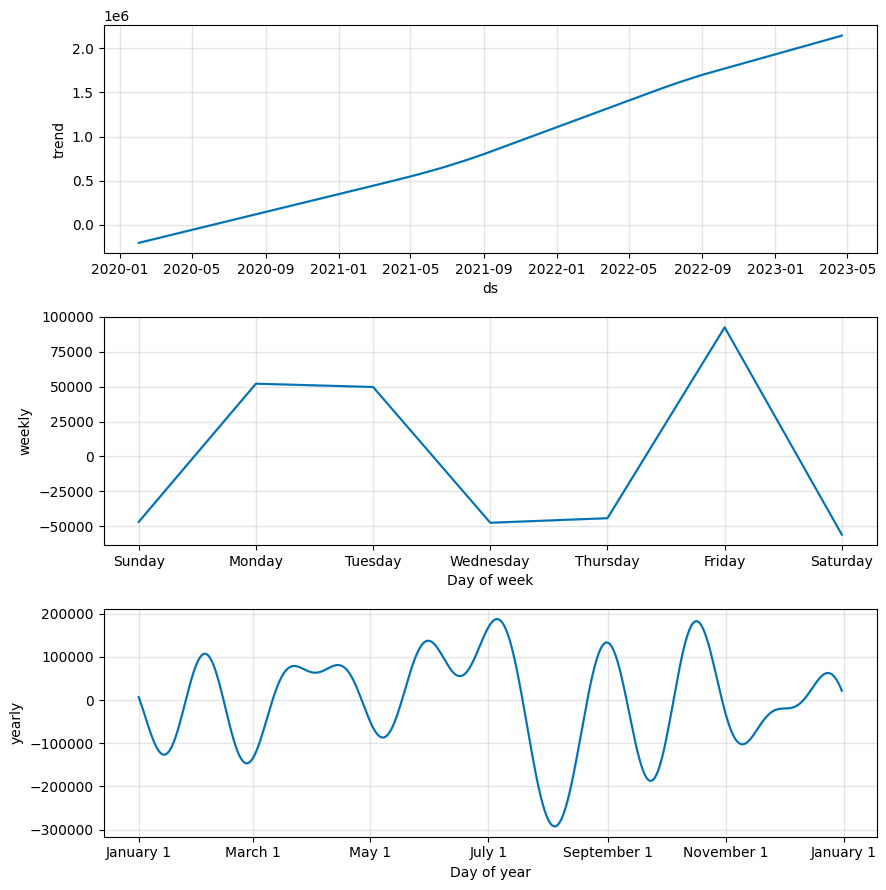

In [1]:
import numpy as np # for numerical operations
import pandas as pd # for data processing
import plotly.express as px # for plotting
from prophet import Prophet # for time series forecasting
import warnings # to ignore warnings
warnings.filterwarnings('ignore') # filter warnings
df=pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv") # read data from github
# 5% of the dataset is used for faster execution
df=df.sample(frac=0.05, random_state=42) # sample 5% of the dataset for faster execution of the code and random state is set to 42 for reproducibility
display("First 5 rows of the dataset", df.head()) # display first 5 rows of the dataset
# find null values
display("Number of missing values in each column", df.isnull().sum())
df=df.dropna() # drop NaN values or missing values
display("Number of missing values in each column after dropping NaN values", df.isnull().sum()) # display first 5 rows of the dataset
df['date']=pd.to_datetime(df['date']) # convert date column to datetime format
display("First 5 rows of the dataset after adding new columns", df.head()) # display first 5 rows of the dataset
fig=px.bar(df, x='date', y='cases', color='cases', title='US COVID-19 Cases') # bar plot using plotly express 
fig.show() # plot using plotly express
cases=df['cases'].sum() # total cases
deaths=df['deaths'].sum() # total deaths
labels=['cases', 'deaths'] # labels for pie chart
values=[cases, deaths] # values for pie chart
fig=px.pie(df,
              values=values,
                names=labels, title='US COVID-19 Cases and Deaths'
                ,hole=0.5) # pie chart using plotly express
fig.show() # plot using plotly express
death_rate=deaths/cases*100 # death rate
print("Death rate in US is", death_rate, "%") # print death rate
fig=px.bar(df, x='date', y='deaths', color='deaths', title='US COVID-19 Deaths', height=500, width=1000) # bar plot using plotly express
fig.show() # plot using plotly express
# Information about the dataset
df.info() # information about the dataset
model=Prophet() # create an instance of Prophet class
df=df.rename(columns={'date':'ds', 'cases':'y'}) # rename columns as per Prophet requirements
model.fit(df) # fit the model
future=model.make_future_dataframe(periods=30) # create future dates for 30 days
forecast=model.predict(future) # predict the future
fig=model.plot(forecast) # plot the forecast
fig.show() # plot the forecast
fig=model.plot_components(forecast) # plot the forecast components
fig.show() # plot the forecast components

This code is a Python script that uses Prophet, a time series forecasting library, to predict the number of COVID-19 cases and deaths in the United States. The script first imports the necessary libraries, including NumPy, Pandas, and Plotly Express. It then reads in data from a CSV file hosted on GitHub that contains information about COVID-19 cases and deaths in US states. To speed up execution, the script samples 5% of the dataset and drops any rows with missing values. The script then converts the date column to a datetime format and creates a bar plot and pie chart using Plotly Express to visualize the data.

After visualizing the data, the script calculates the death rate and creates another bar plot using Plotly Express to visualize the number of deaths over time. The script then uses Prophet to fit a time series model to the data and predict the number of cases and deaths for the next 30 days. Finally, the script plots the forecast and its components using Prophet's built-in plotting functions.

Overall, this code provides a comprehensive analysis of COVID-19 cases and deaths in the United States using time series forecasting techniques. It demonstrates how to use Prophet to fit a model to time series data and make predictions for future time periods.

'First 5 rows of the dataset'

,Date,Date_YMD,Daily Confirmed,Daily Deceased
0,30 January 2020,2020-01-30,1,0
1,31 January 2020,2020-01-31,0,0
2,1 February 2020,2020-02-01,0,0
3,2 February 2020,2020-02-02,1,0
4,3 February 2020,2020-02-03,1,0


'Number of missing values in each column'

Date               0
Date_YMD           0
Daily Confirmed    0
Daily Deceased     0
dtype: int64

'Columns of the dataset'

Index(['Date_YMD', 'Daily Confirmed', 'Daily Deceased'], dtype='object')

Death rate in India is 1.2840580507834722 %


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_YMD         720 non-null    object
 1   Daily Confirmed  720 non-null    int64 
 2   Daily Deceased   720 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.0+ KB


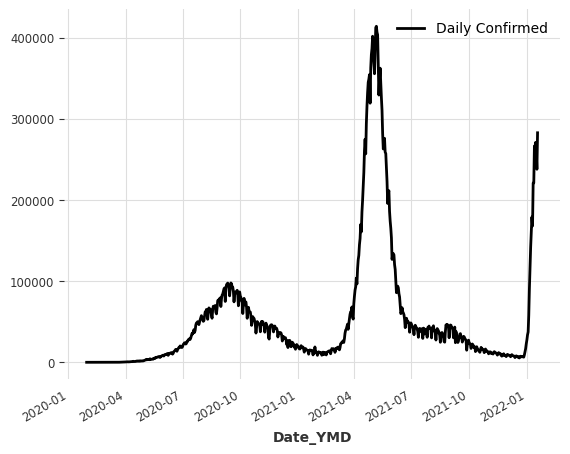

In [7]:
import numpy as np # for numerical operations
import pandas as pd # for data processing
import plotly.express as px # for plotting
from darts import TimeSeries # for time series analysis
import warnings # to ignore warnings
warnings.filterwarnings('ignore') # filter warnings 
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/COVID19%20data%20for%20overall%20INDIA.csv") # read data from github 
display("First 5 rows of the dataset", df.head()) # display first 5 rows of the dataset
# find null values
display("Number of missing values in each column", df.isnull().sum())
# drop date column
df=df.drop(['Date'], axis=1)
# columns display
display("Columns of the dataset", df.columns) # display columns of the dataset
fig=px.bar(df, x='Date_YMD', y='Daily Confirmed') # plot using plotly
fig.show() # plot using plotly
cases=df['Daily Confirmed'].sum() # total cases
deaths=df['Daily Deceased'].sum() # total deaths 
labels=['cases', 'deaths'] # labels for pie chart
values=[cases, deaths] # values for pie chart
fig=px.pie(df, 
           values=values, 
           names=labels, title='India COVID-19 Cases and Deaths'
                ,hole=0.5) # plot using plotly
fig.show() # plot using plotly
death_rate=deaths/cases*100 # death rate
print("Death rate in India is", death_rate, "%") # print death rate
fig=px.bar(df, x='Date_YMD', y='Daily Deceased') # plot using plotly
fig.show() # plot using plotly
# Information about the dataset
df.info() # information about the dataset    
series=TimeSeries.from_dataframe(df, 'Date_YMD', ['Daily Confirmed']) # create a time series
series.plot() # plot the time series

This Python script uses various libraries such as NumPy, Pandas, Plotly Express, and Darts to analyze and visualize COVID-19 data for India. The script first imports the necessary libraries and reads in data from a CSV file hosted on GitHub that contains information about COVID-19 cases and deaths in India. The script then displays the first 5 rows of the dataset and checks for any missing values. It drops the date column and displays the columns of the dataset.

The script then creates a bar plot and pie chart using Plotly Express to visualize the data. The bar plot shows the daily confirmed cases over time, while the pie chart shows the total number of cases and deaths. The script calculates the death rate and prints it to the console. It then creates another bar plot using Plotly Express to visualize the number of deaths over time.

The script displays information about the dataset and creates a time series using Darts. It then plots the time series using Darts' built-in plotting function. Overall, this code provides a comprehensive analysis of COVID-19 cases and deaths in India using various data analysis and visualization techniques. It demonstrates how to use Plotly Express and Darts to create visualizations and analyze time series data.

In [8]:
import cv2 as cv # for image processing
import matplotlib.pyplot as plot # for plotting
cv.__version__ # check the version of OpenCV

'4.8.0'

In [9]:
cap=cv.VideoCapture(0) # capture video from webcam
while True:
    ret, frame=cap.read() # read the frame
    cv.imshow('frame', frame) # display the frame
    if cv.waitKey(1)==ord('q'): # press q to exit
        break
cap.release() # release the video capture object
cv.destroyAllWindows() # destroy all windows